In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
from fastai.vision import *
from fastai.metrics import error_rate


In [3]:
bs=64

In [4]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [5]:
path= untar_data(URLs.PETS); path

PosixPath('/home/nms105/.fastai/data/oxford-iiit-pet')

In [6]:
path.ls()

[PosixPath('/home/nms105/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/home/nms105/.fastai/data/oxford-iiit-pet/annotations')]

In [7]:
path_anno =path/'annotations'
path_img=path/'images'

In [8]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/nms105/.fastai/data/oxford-iiit-pet/images/Siamese_87.jpg'),
 PosixPath('/home/nms105/.fastai/data/oxford-iiit-pet/images/chihuahua_126.jpg'),
 PosixPath('/home/nms105/.fastai/data/oxford-iiit-pet/images/german_shorthaired_97.jpg'),
 PosixPath('/home/nms105/.fastai/data/oxford-iiit-pet/images/Bombay_157.jpg'),
 PosixPath('/home/nms105/.fastai/data/oxford-iiit-pet/images/Bengal_12.jpg')]

In [9]:
pat = r'/([^/]+)_\d+.jpg$'

In [10]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

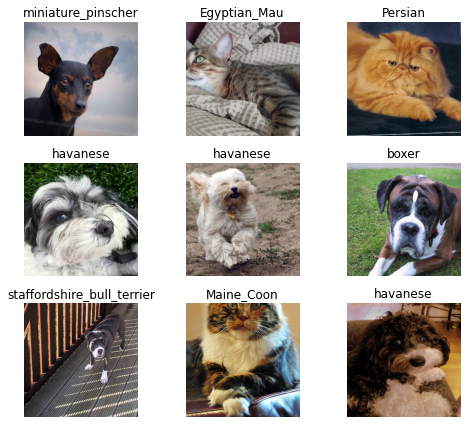

In [11]:
data.show_batch(rows=3, figsize=(7,6))

In [12]:
print(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [13]:
learn= cnn_learner(data,models.resnet34, metrics=error_rate)

In [14]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [15]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,1.396399,0.285080,0.089310,04:37
1,0.610300,0.265459,0.081867,01:29
2,0.393111,0.226141,0.069012,01:28
3,0.274453,0.206137,0.066306,01:28


In [16]:
pwd

'/home/nms105/course-v3/nbs/dl1/My_exercise'

In [17]:
learn.save('satge-1')

In [18]:
interp= ClassificationInterpretation.from_learner(learn)
losses, idxs= interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

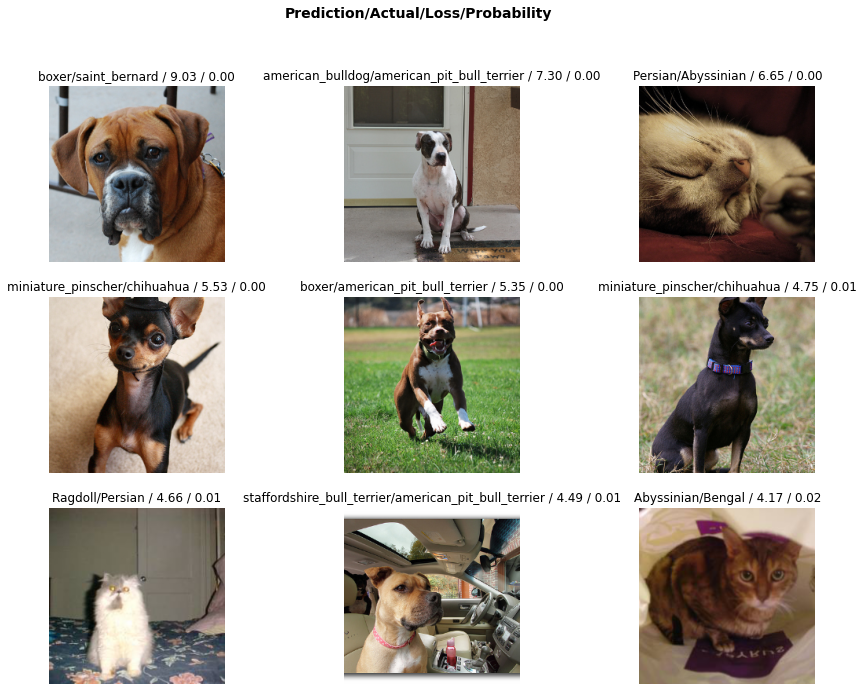

In [25]:
interp.plot_top_losses(9, figsize=(15,11))

In [30]:
doc(interp.plot_top_losses)

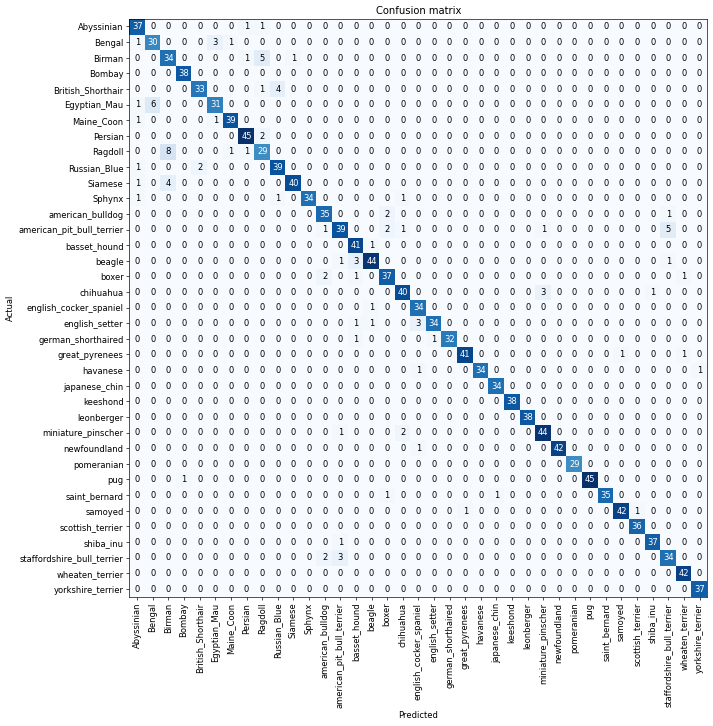

In [31]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [32]:
learn.unfreeze()

In [33]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.673494,0.327852,0.110961,04:10


In [34]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


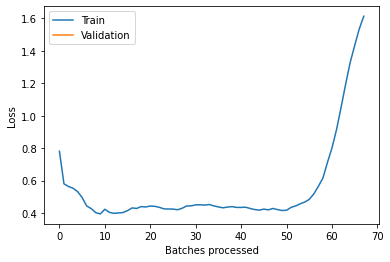

In [35]:
learn.recorder.plot_losses()

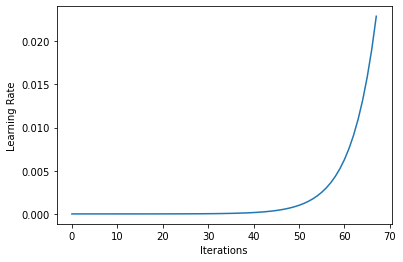

In [39]:
learn.recorder.plot_lr()

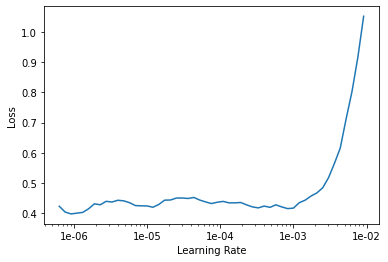

In [40]:
learn.recorder.plot()

In [41]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.380780,0.253051,0.082544,01:32
1,0.325487,0.242444,0.079161,01:30


In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=99, bs=bs//2).normalize(imagenet_stats)


In [42]:
learn=cnn_learner(data, models.resnet50, metrics=error_rate)

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


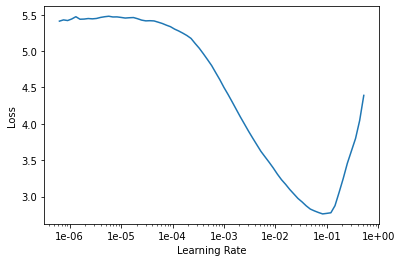

In [43]:
learn.lr_find()
learn.recorder.plot()

In [44]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.979928,0.231211,0.078484,01:35
1,0.530208,0.305825,0.090663,01:35
2,0.397304,0.255217,0.080514,01:35
3,0.288161,0.202090,0.054804,01:35
4,0.232987,0.187693,0.053451,01:35
5,0.167278,0.181650,0.060217,01:35
6,0.117663,0.174513,0.052097,01:35
7,0.101581,0.167329,0.051421,01:34


In [45]:
learn.save('stage-1-50')

In [47]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.066951,0.170620,0.052097,01:40
1,0.060648,0.168260,0.053451,01:40
2,0.050160,0.164940,0.050068,01:40


In [48]:
learn.load('stage-1-50')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
chihuahua,german_shorthaired,japanese_chin,havanese,yorkshire_terrier
Path: /home/nms105/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
saint_bernard,miniature_pinscher,Ragdoll,Bombay,wheaten_terrier
Path: /home/nms105/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(

In [49]:
interp = ClassificationInterpretation.from_learner(learn)

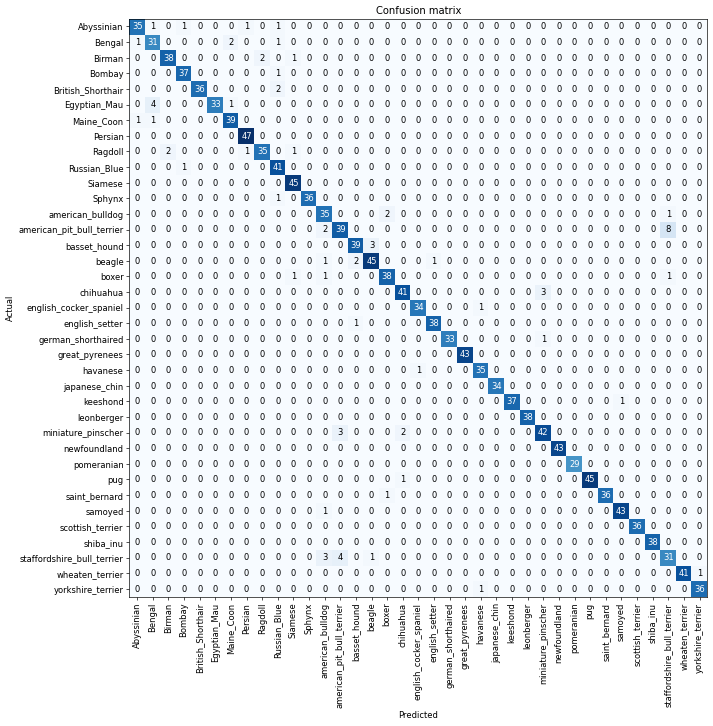

In [50]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [53]:
interp.most_confused(min_val=3)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 8),
 ('Egyptian_Mau', 'Bengal', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('basset_hound', 'beagle', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('miniature_pinscher', 'american_pit_bull_terrier', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3)]

In [55]:
pwd

'/home/nms105/course-v3/nbs/dl1/My_exercise'

In [21]:
path= untar_data(URLs.MNIST_SAMPLE); Path

pathlib.Path

In [29]:
tfms = get_transforms(do_flip=False)
data=ImageDataBunch.from_folder(path, ds_tfms= tfms, size=26)

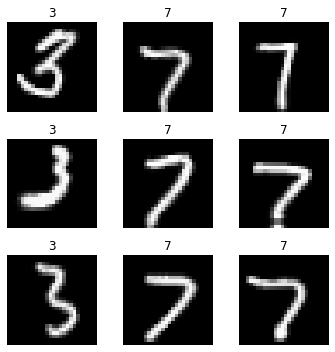

In [30]:
data.show_batch(rows=3, figsize=(5,5))

In [34]:
learn=cnn_learner(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.218841,0.091007,0.967125,00:29
1,0.131216,0.050812,0.979882,00:22


In [35]:
df= pd.read_csv(path/'labels.csv')

In [36]:
df


,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0
...,...,...
14429,valid/7/1321.png,1
14430,valid/7/8282.png,1
14431,valid/7/1949.png,1
14432,valid/7/3166.png,1


In [43]:
data=ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

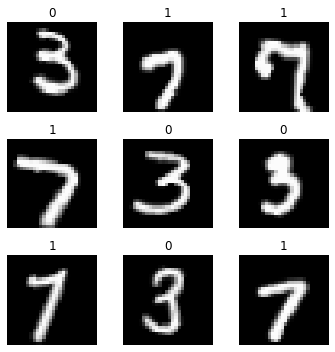

In [44]:
data.show_batch(rows=3, figsize=(5,5))

In [48]:
data= ImageDataBunch.from_df(path,df, ds_tfms=tfms, size=28)